In [26]:
import pandas as pd
import numpy as np
import datetime

In [73]:
data = ("/content/DATA1.xlsx")
df = pd.read_excel(data)
print(df.describe)
df.isnull().sum()
df['Description'] == 'KG AST BISC RED CAN 1600G'

<bound method NDFrame.describe of         Tanggal  PLU                Description      Sales  Struk  QTY Sales
0    01-01-2019  234             DJI SAM SOE 12  123200.00      5          7
1    01-01-2019  719          MD EGG DROPS 110G    7000.00      1          1
2    02-01-2019  234             DJI SAM SOE 12   35200.00      2          2
3    03-01-2019  234             DJI SAM SOE 12   17600.00      1          1
4    03-01-2019  374  KG AST BISC RED CAN 1600G   80818.18      1          1
..          ...  ...                        ...        ...    ...        ...
969  28-09-2020  234             DJI SAM SOE 12   36800.00      1          2
970  28-09-2020  719          MD EGG DROPS 110G    6818.18      1          1
971  29-09-2020  234             DJI SAM SOE 12   18400.00      1          1
972  29-09-2020  719          MD EGG DROPS 110G    6818.18      1          1
973  30-09-2020  234             DJI SAM SOE 12   18400.00      1          1

[974 rows x 6 columns]>


0      False
1      False
2      False
3      False
4       True
       ...  
969    False
970    False
971    False
972    False
973    False
Name: Description, Length: 974, dtype: bool

In [13]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Set the date as index 
df = df.set_index('Tanggal')
# Select the proper time period for weekly aggreagation
df = df['2019-01-01':'2020-12-31'].resample('W').sum()
df.head()

,PLU,Sales,Struk,QTY Sales
Tanggal,,,,
2019-01-06,4929,976245.90,32,35
2019-01-13,5291,302818.19,20,23
2019-01-20,4871,351200.00,21,22
2019-01-27,3602,209218.20,13,14
2019-02-03,3392,258863.65,14,16


In [82]:
df1=df[df['Description'] == "KG AST BISC RED CAN 1600G"]
df1

,Tanggal,PLU,Description,Sales,Struk,QTY Sales
4,03-01-2019,374,KG AST BISC RED CAN 1600G,80818.18,1,1
8,04-01-2019,374,KG AST BISC RED CAN 1600G,80818.18,1,1
59,09-02-2019,374,KG AST BISC RED CAN 1600G,85000.00,1,1
87,25-02-2019,374,KG AST BISC RED CAN 1600G,85000.00,1,1
97,04-03-2019,374,KG AST BISC RED CAN 1600G,85000.00,1,1
...,...,...,...,...,...,...
861,09-07-2020,374,KG AST BISC RED CAN 1600G,0.00,0,0
897,04-08-2020,374,KG AST BISC RED CAN 1600G,89090.91,1,1
914,17-08-2020,374,KG AST BISC RED CAN 1600G,0.00,0,0
945,10-09-2020,374,KG AST BISC RED CAN 1600G,89090.91,1,1


In [85]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# Set the date as index 
df = df.set_index('Tanggal')
# Select the proper time period for weekly aggreagation
df = df['2019-01-01':'2020-12-31'].resample('W').sum()
df.head()

,PLU,Sales,Struk,QTY Sales
Tanggal,,,,
2019-01-06,4929,976245.90,32,35
2019-01-13,5291,302818.19,20,23
2019-01-20,4871,351200.00,21,22
2019-01-27,3602,209218.20,13,14
2019-02-03,3392,258863.65,14,16


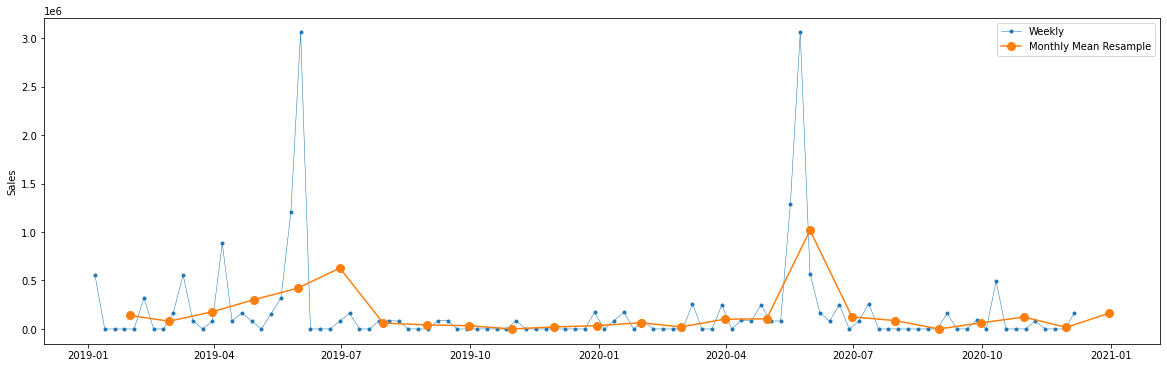

In [86]:
import warnings
import matplotlib.pyplot as plt
df2 = df1['Sales']
y = df2
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Sales')
ax.legend();